In [1]:
!pip install boruta

In [2]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Basic Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

#Metrics (Computation)
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

#Boosting Algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("F:\\Research\Breast Cancer\\SEER Breast Cancer Dataset.csv")
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,White,Married (including common law),T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,Alive


In [4]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [5]:
df.shape

(4024, 15)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4024.0,53.972167,8.963134,30.0,47.0,54.0,61.0,69.0
Tumor Size,4024.0,30.473658,21.119696,1.0,16.0,25.0,38.0,140.0
Regional Node Examined,4024.0,14.357107,8.099675,1.0,9.0,14.0,19.0,61.0
Reginol Node Positive,4024.0,4.158052,5.109331,1.0,1.0,2.0,5.0,46.0
Survival Months,4024.0,71.297962,22.921430,1.0,56.0,73.0,90.0,107.0


Alive    3408
Dead      616
Name: Status, dtype: int64


<AxesSubplot:>

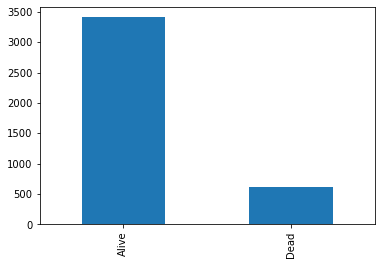

In [7]:
print(df.Status.value_counts())
df.Status.value_counts().plot(kind="bar")

**Encoding with LabelEncoder**

In [8]:
df = df.apply(LabelEncoder().fit_transform)
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,13,1,1,1,2,4,0,1,39,1,1,18,10,0,0
1,17,1,1,1,1,2,0,1,44,1,1,24,8,1,0
2,37,2,1,1,0,1,1,1,24,1,1,3,0,1,1
3,16,2,0,0,0,0,0,1,18,1,1,25,0,1,1
4,33,2,1,1,1,2,0,1,34,1,1,20,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,22,2,1,0,0,0,3,1,9,1,1,18,0,106,0
4020,23,2,1,0,1,2,1,1,8,0,0,12,4,106,0
4021,23,2,0,0,0,0,0,1,8,0,0,3,1,106,0
4022,30,1,1,0,0,0,0,1,8,1,1,13,1,106,0


<AxesSubplot:>

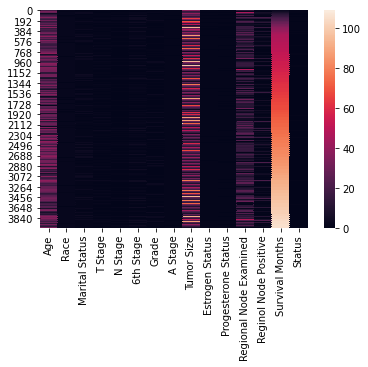

In [9]:
import seaborn as sns
sns.heatmap(df)

In [10]:
x = df.drop(['Status'],axis =1)
y = df['Status']

In [11]:
#df.info

In [12]:
'''# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X = df.drop('Status', axis=1)
Y = df['Status']
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])'''

"# Feature Selection with Univariate Statistical Tests\nfrom pandas import read_csv\nfrom numpy import set_printoptions\nfrom sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import f_classif\nX = df.drop('Status', axis=1)\nY = df['Status']\n# feature extraction\ntest = SelectKBest(score_func=f_classif, k=4)\nfit = test.fit(X, Y)\n# summarize scores\nset_printoptions(precision=3)\nprint(fit.scores_)\nfeatures = fit.transform(X)\n# summarize selected features\nprint(features[0:5,:])"

**apply SelectKBest class to extract top 10 best features**

In [13]:
'''#apply SelectKBest class to extract top 10 best features
kbest = SelectKBest(score_func=chi2, k=39)
fit = kbest.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
fScores = pd.concat([df_columns,df_scores],axis=1)
fScores.columns = ['Feature','Score']  #naming the dataframe columns
print(fScores.nlargest(15,'Score')) 
plt.show()'''


"#apply SelectKBest class to extract top 10 best features\nkbest = SelectKBest(score_func=chi2, k=39)\nfit = kbest.fit(x,y)\ndf_scores = pd.DataFrame(fit.scores_)\ndf_columns = pd.DataFrame(x.columns)\n#concat two dataframes for better visualization \nfScores = pd.concat([df_columns,df_scores],axis=1)\nfScores.columns = ['Feature','Score']  #naming the dataframe columns\nprint(fScores.nlargest(15,'Score')) \nplt.show()"

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:50:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.0535476  0.04644491 0.05209235 0.05101075 0.04940238 0.09516416
 0.05255044 0.04942639 0.04250563 0.12215221 0.10827341 0.04583262
 0.05990021 0.17169687]


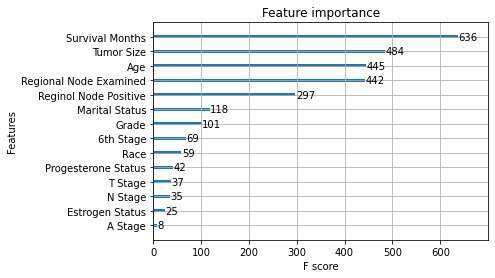

In [14]:
# plot feature importance manually
#XGBoost
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance

# fit model no training data
model = XGBClassifier()
model.fit(x, y)
# feature importance
print(model.feature_importances_)
# plot
plot_importance(model)
pyplot.show()

# xgboost for feature importance on a classification problem

[16:51:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.03976
Feature: 1, Score: 0.04328
Feature: 2, Score: 0.01687
Feature: 3, Score: 0.08084
Feature: 4, Score: 0.09975
Feature: 5, Score: 0.01704
Feature: 6, Score: 0.03634
Feature: 7, Score: 0.25934
Feature: 8, Score: 0.08090
Feature: 9, Score: 0.16074
Feature: 10, Score: 0.01686
Feature: 11, Score: 0.02107
Feature: 12, Score: 0.06643
Feature: 13, Score: 0.06076


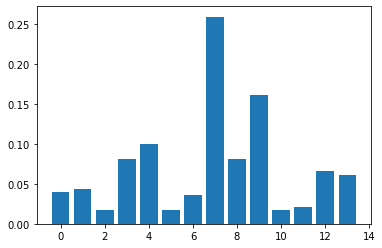

In [15]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
x, y = make_classification(n_samples=4024, n_features=14, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = XGBClassifier()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# linear regression feature importance

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.00000
Feature: 3, Score: 80.45119
Feature: 4, Score: 21.08104
Feature: 5, Score: 2.64578
Feature: 6, Score: -0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: -0.00000
Feature: 9, Score: -0.00000
Feature: 10, Score: 21.74208
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 92.38744


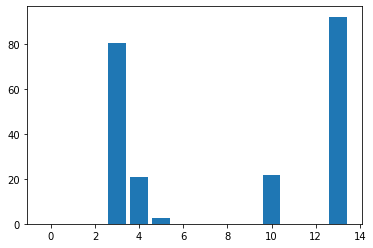

In [16]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define dataset
x, y = make_regression(n_samples=4024, n_features=14, n_informative=5, random_state=1)

# define the model
model = LinearRegression()

# fit the model
model.fit(x, y)

# get importance
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# logistic regression for feature importance

Feature: 0, Score: 0.06957
Feature: 1, Score: 0.20235
Feature: 2, Score: 0.01906
Feature: 3, Score: -0.24096
Feature: 4, Score: 0.09222
Feature: 5, Score: -0.15440
Feature: 6, Score: 0.38460
Feature: 7, Score: 0.01627
Feature: 8, Score: -0.02233
Feature: 9, Score: 0.01961
Feature: 10, Score: -0.01673
Feature: 11, Score: -0.24145
Feature: 12, Score: -0.05283
Feature: 13, Score: -0.03105


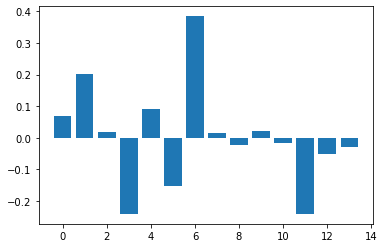

In [17]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
x, y = make_classification(n_samples=4024, n_features=14, n_informative=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(x, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# DecisionTreeRegressor Feature Importance 

Feature: 0, Score: 0.00106
Feature: 1, Score: 0.00155
Feature: 2, Score: 0.00137
Feature: 3, Score: 0.41114
Feature: 4, Score: 0.02125
Feature: 5, Score: 0.00157
Feature: 6, Score: 0.00117
Feature: 7, Score: 0.00119
Feature: 8, Score: 0.00149
Feature: 9, Score: 0.00151
Feature: 10, Score: 0.02580
Feature: 11, Score: 0.00084
Feature: 12, Score: 0.00109
Feature: 13, Score: 0.52897


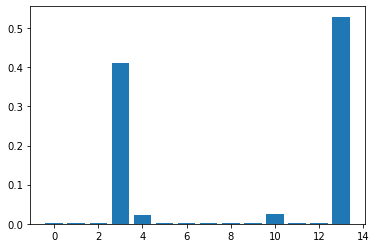

In [18]:
#Decision Tree Feature Importance
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
x, y = make_regression(n_samples=4024, n_features=14, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# decision tree for feature importance on a classification problem

Feature: 0, Score: 0.01297
Feature: 1, Score: 0.10941
Feature: 2, Score: 0.01377
Feature: 3, Score: 0.10518
Feature: 4, Score: 0.10790
Feature: 5, Score: 0.02226
Feature: 6, Score: 0.06039
Feature: 7, Score: 0.02159
Feature: 8, Score: 0.00894
Feature: 9, Score: 0.00911
Feature: 10, Score: 0.01155
Feature: 11, Score: 0.28013
Feature: 12, Score: 0.22150
Feature: 13, Score: 0.01529


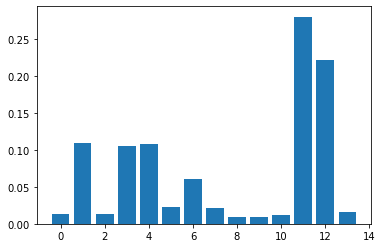

In [19]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
x, y = make_classification(n_samples=4024, n_features=14, n_informative=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# permutation feature importance with knn for classification

Feature: 0, Score: 0.01019
Feature: 1, Score: 0.06685
Feature: 2, Score: 0.00328
Feature: 3, Score: 0.04200
Feature: 4, Score: 0.03956
Feature: 5, Score: 0.00368
Feature: 6, Score: 0.04707
Feature: 7, Score: 0.08171
Feature: 8, Score: 0.04354
Feature: 9, Score: 0.07232
Feature: 10, Score: 0.00293
Feature: 11, Score: 0.00586
Feature: 12, Score: 0.05611
Feature: 13, Score: 0.01859


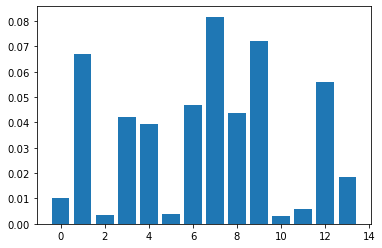

In [20]:
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
x, y = make_classification(n_samples=4024, n_features=14, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(x, y)
# perform permutation importance
results = permutation_importance(model, x, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# permutation feature importance with knn for regression

Feature: 0, Score: 46.85922
Feature: 1, Score: 31.63219
Feature: 2, Score: 62.56392
Feature: 3, Score: 6355.23088
Feature: 4, Score: 448.51049
Feature: 5, Score: 109.21051
Feature: 6, Score: 29.60157
Feature: 7, Score: 64.61818
Feature: 8, Score: 81.44292
Feature: 9, Score: 102.38673
Feature: 10, Score: 500.36270
Feature: 11, Score: 66.27093
Feature: 12, Score: 91.22507
Feature: 13, Score: 7831.98209


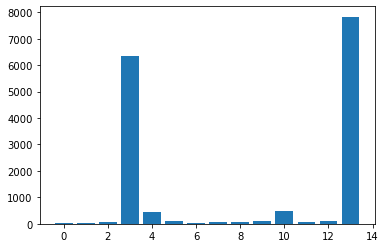

In [21]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
x, y = make_regression(n_samples=4024, n_features=14, n_informative=5, random_state=1)
# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(x, y)
# perform permutation importance
results = permutation_importance(model, x, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Random Forest Classification Feature Importance

Feature: 0, Score: 0.07145
Feature: 1, Score: 0.10743
Feature: 2, Score: 0.01764
Feature: 3, Score: 0.07940
Feature: 4, Score: 0.09878
Feature: 5, Score: 0.01894
Feature: 6, Score: 0.05362
Feature: 7, Score: 0.13297
Feature: 8, Score: 0.12266
Feature: 9, Score: 0.14386
Feature: 10, Score: 0.01734
Feature: 11, Score: 0.02081
Feature: 12, Score: 0.05706
Feature: 13, Score: 0.05804


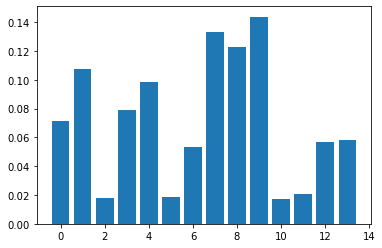

In [22]:
#Random Forest Classification Feature Importance
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
x, y = make_classification(n_samples=4024, n_features=14, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [23]:
'''import xgboost as xgb
from xgboost import XGBClassifier
from boruta import BorutaPy
from sklearn import metrics

xgbfs = xgb.XGBClassifier()
feat_selector = BorutaPy(xgbfs, n_estimators ='auto', verbose = 2, random_state = 2)
feat_selector.fit(x,y)
feat_selector.support_

feat_selector.ranking_

xtrain_filtered = feat_selector.transform(x)
xtrain_filtered.shape

feature_ranks = list(zip(df.columns, feat_selector.ranking_, feat_selector.support_))
feature_ranks'''

"import xgboost as xgb\nfrom xgboost import XGBClassifier\nfrom boruta import BorutaPy\nfrom sklearn import metrics\n\nxgbfs = xgb.XGBClassifier()\nfeat_selector = BorutaPy(xgbfs, n_estimators ='auto', verbose = 2, random_state = 2)\nfeat_selector.fit(x,y)\nfeat_selector.support_\n\nfeat_selector.ranking_\n\nxtrain_filtered = feat_selector.transform(x)\nxtrain_filtered.shape\n\nfeature_ranks = list(zip(df.columns, feat_selector.ranking_, feat_selector.support_))\nfeature_ranks"

# Boruta RandomForestClassifier feature_ranks

In [24]:
from boruta import BorutaPy
rffs = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
rffs.fit(x,y)
feat_selector = BorutaPy(rffs, n_estimators ='auto', verbose = 2, random_state = 2)
feat_selector.fit(x,y)
feat_selector.support_

feat_selector.ranking_

xtrain_filtered = feat_selector.transform(x)
xtrain_filtered.shape

feature_ranks = list(zip(df.columns, feat_selector.ranking_, feat_selector.support_))
feature_ranks

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	3
I

[('Age', 1, True),
 ('Race', 1, True),
 ('Marital Status', 3, False),
 ('T Stage', 1, True),
 ('N Stage', 1, True),
 ('6th Stage', 5, False),
 ('Grade', 1, True),
 ('A Stage', 1, True),
 ('Tumor Size', 1, True),
 ('Estrogen Status', 1, True),
 ('Progesterone Status', 3, False),
 ('Regional Node Examined', 2, False),
 ('Reginol Node Positive', 1, True),
 ('Survival Months', 1, True)]

# ExtraTreesClassifier feature_importance

In [25]:
from sklearn.ensemble import ExtraTreesClassifier

extr = ExtraTreesClassifier()

extr.fit(x,y)

feature_importance = extr.feature_importances_
feature_importance

imp = pd.DataFrame(feature_importance, columns = ['Gain Score'])
cols = pd.DataFrame(df.columns, columns = ['Features'])
imp,cols
frame = pd.concat([cols,imp], axis=1)
frame

,Features,Gain Score
0,Age,0.083093
1,Race,0.099016
2,Marital Status,0.022025
3,T Stage,0.080582
4,N Stage,0.103810
5,6th Stage,0.022370
6,Grade,0.063072
7,A Stage,0.133610
8,Tumor Size,0.115224
9,Estrogen Status,0.119530


**Work with selected features**

In [26]:
df01 = pd.read_csv("F:\\Research\Breast Cancer\\Breast Cancer - Selected Features.csv")
df01

,Race,T Stage,N Stage,Grade,A Stage,Tumor Size,Estrogen Status,Survival Months,Status
0,"Other (American Indian/AK Native, Asian/Pacifi...",T2,N3,Moderately differentiated; Grade II,Regional,40,Positive,1,Alive
1,"Other (American Indian/AK Native, Asian/Pacifi...",T2,N2,Moderately differentiated; Grade II,Regional,45,Positive,2,Alive
2,White,T2,N1,Poorly differentiated; Grade III,Regional,25,Positive,2,Dead
3,White,T1,N1,Moderately differentiated; Grade II,Regional,19,Positive,2,Dead
4,White,T2,N2,Moderately differentiated; Grade II,Regional,35,Positive,3,Dead
...,...,...,...,...,...,...,...,...,...
4019,White,T1,N1,Well differentiated; Grade I,Regional,10,Positive,107,Alive
4020,White,T1,N2,Poorly differentiated; Grade III,Regional,9,Negative,107,Alive
4021,White,T1,N1,Moderately differentiated; Grade II,Regional,9,Negative,107,Alive
4022,"Other (American Indian/AK Native, Asian/Pacifi...",T1,N1,Moderately differentiated; Grade II,Regional,9,Positive,107,Alive


In [27]:
df01 = df01.apply(LabelEncoder().fit_transform)
df01

,Race,T Stage,N Stage,Grade,A Stage,Tumor Size,Estrogen Status,Survival Months,Status
0,1,1,2,0,1,39,1,0,0
1,1,1,1,0,1,44,1,1,0
2,2,1,0,1,1,24,1,1,1
3,2,0,0,0,1,18,1,1,1
4,2,1,1,0,1,34,1,2,1
...,...,...,...,...,...,...,...,...,...
4019,2,0,0,3,1,9,1,106,0
4020,2,0,1,1,1,8,0,106,0
4021,2,0,0,0,1,8,0,106,0
4022,1,0,0,0,1,8,1,106,0


In [28]:
filtered_x = df01.drop(['Status'],axis =1)
filtered_y = df01['Status']

In [29]:
standardScaler = StandardScaler()
new_x = standardScaler.fit_transform(filtered_x)
new_x

array([[-1.3746487 ,  0.28115846,  2.25215674, ...,  0.48371507,
         0.26765242, -3.06729118],
       [-1.3746487 ,  0.28115846,  0.80997362, ...,  0.73117489,
         0.26765242, -3.02365846],
       [ 0.39715987,  0.28115846, -0.6322095 , ..., -0.25866439,
         0.26765242, -3.02365846],
       ...,
       [ 0.39715987, -1.02528685, -0.6322095 , ..., -1.05053581,
        -3.73618894,  1.55777696],
       [-1.3746487 , -1.02528685, -0.6322095 , ..., -1.05053581,
         0.26765242,  1.55777696],
       [ 0.39715987, -1.02528685, -0.6322095 , ..., -1.10002778,
         0.26765242,  1.55777696]])

In [30]:
df02 = pd.DataFrame(new_x, columns = filtered_x.columns)
df02.head()

,Race,T Stage,N Stage,Grade,A Stage,Tumor Size,Estrogen Status,Survival Months
0,-1.374649,0.281158,2.252157,-0.679291,0.152963,0.483715,0.267652,-3.067291
1,-1.374649,0.281158,0.809974,-0.679291,0.152963,0.731175,0.267652,-3.023658
2,0.397160,0.281158,-0.632209,0.304678,0.152963,-0.258664,0.267652,-3.023658
3,0.397160,-1.025287,-0.632209,-0.679291,0.152963,-0.555616,0.267652,-3.023658
4,0.397160,0.281158,0.809974,-0.679291,0.152963,0.236255,0.267652,-2.980026


<AxesSubplot:>

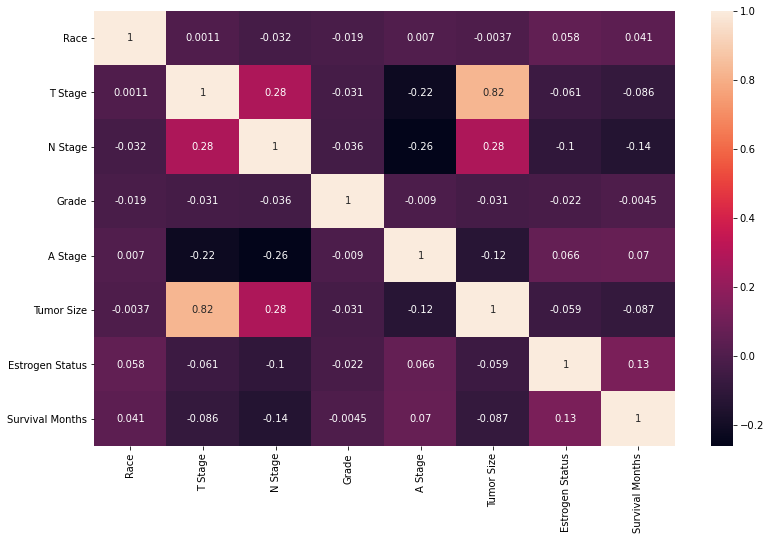

In [31]:
plt.figure(figsize=(13,8))
feature_corr = filtered_x.columns
colname = filtered_x.corr().index
sns.heatmap(df[feature_corr].corr(),annot=True)

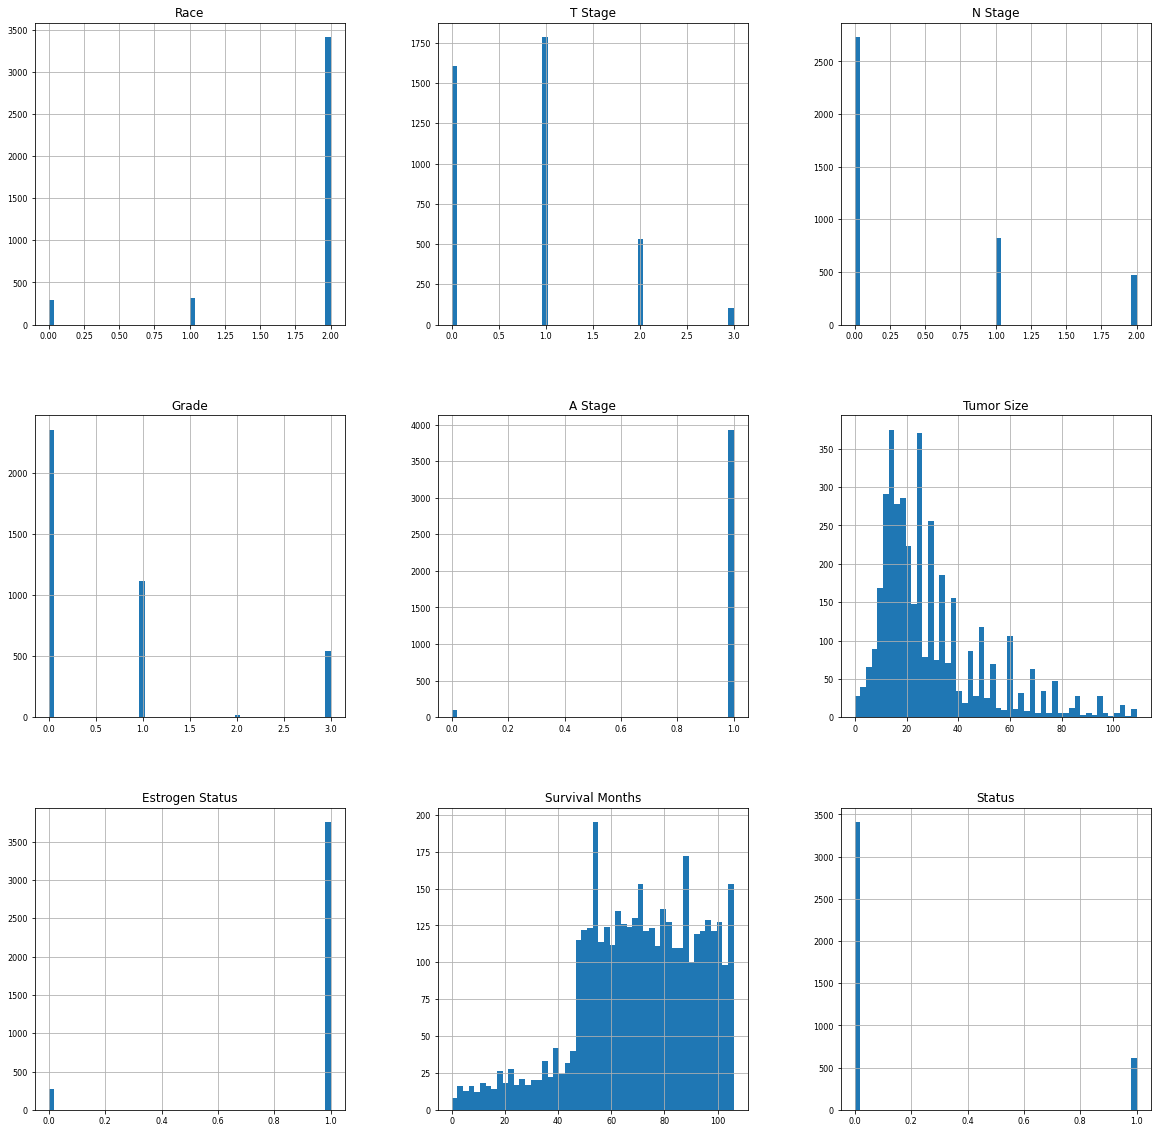

In [32]:
df01.hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8);

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(new_x, filtered_y, test_size = .20, random_state = 12)

**RandomForestClassifier**

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop= 1000, num = 25)]
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(start = 200, stop= 2000, num = 20)]
min_samples_split = [2,5,10,12,15,20]
min_samples_leaf = [2,4,6,8,10,15,20]
#creat ids
grids ={
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'criterion':['gini', 'entropy']
}
print(grids)

{'n_estimators': [200, 233, 266, 300, 333, 366, 400, 433, 466, 500, 533, 566, 600, 633, 666, 700, 733, 766, 800, 833, 866, 900, 933, 966, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [200, 294, 389, 484, 578, 673, 768, 863, 957, 1052, 1147, 1242, 1336, 1431, 1526, 1621, 1715, 1810, 1905, 2000], 'min_samples_split': [2, 5, 10, 12, 15, 20], 'min_samples_leaf': [2, 4, 6, 8, 10, 15, 20], 'criterion': ['gini', 'entropy']}


In [36]:
rf=RandomForestClassifier()

In [37]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = grids,
               n_iter = 200, cv = 5, verbose=2, random_state=35, n_jobs = -1)

rf_random.fit(xtrain, ytrain)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [200, 294, 389, 484, 578,
                                                      673, 768, 863, 957, 1052,
                                                      1147, 1242, 1336, 1431,
                                                      1526, 1621, 1715, 1810,
                                                      1905, 2000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4, 6, 8, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 12, 15,
                                                              20],
        

In [38]:
best_parameters = rf_random.best_params_
best_parameters

{'n_estimators': 333,
 'min_samples_split': 2,
 'min_samples_leaf': 15,
 'max_features': 'log2',
 'max_depth': 484,
 'criterion': 'gini'}

In [39]:
rf = RandomForestClassifier(n_estimators = 666, min_samples_split = 15,
 min_samples_leaf = 20,
 max_features ='log2',
 max_depth= 1242,
 criterion='gini')

In [40]:
rf.fit(xtrain, ytrain)
accuracy= rf.score(xtest,ytest)
accuracy

0.9006211180124224

In [41]:
GridSearchCV

sklearn.model_selection._search.GridSearchCV

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop= 500, num = 15)]
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(start = 100, stop= 1000, num = 10)]
min_samples_split = [2,5,10,12,15]
min_samples_leaf = [2,4,6,8,10,15]
#creat ids
param_grid ={
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'criterion':['gini', 'entropy']
}
print(param_grid)

{'n_estimators': [100, 128, 157, 185, 214, 242, 271, 300, 328, 357, 385, 414, 442, 471, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'min_samples_split': [2, 5, 10, 12, 15], 'min_samples_leaf': [2, 4, 6, 8, 10, 15], 'criterion': ['gini', 'entropy']}


In [44]:
rf1=RandomForestClassifier()

**DecisionTreeClassifier**

In [46]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(xtrain, ytrain)
ypreddt = dt.predict(xtest)
ypreddt
accuracy= dt.score(xtest,ytest)
accuracy

0.8857142857142857

In [47]:
xgbst = XGBClassifier()
xgbst.fit(xtrain, ytrain)
ypredxg =xgbst.predict(xtest)
ypredxg
accuracy= xgbst.score(xtest,ytest)
accuracy

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8944099378881988